In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import binarize
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import joblib
import pickle

In [2]:
dfdiabetes = pd.read_csv('diabetes2.csv')
dfdiabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Preparing Dataset

In [3]:
dfdiabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
dfdiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#DESCRIPTION OF THE DATASET
dfdiabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Splitting
data = dfdiabetes.iloc[:,0:8]
outcome = dfdiabetes.iloc[:,8]
x,y = data,outcome

In [7]:
#DISTRIBUTION OF DATASET INTO TRAINING AND TESTING SETS
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [8]:
# GRID SEARCH CROSS VALIDATION for evaluating the best parameters
gbe = GradientBoostingClassifier(random_state=0)
parameters={
    'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [3, 4, 5]
}
gridsearch=GridSearchCV(gbe,parameters,cv=100,scoring='roc_auc')
gridsearch.fit(x,y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 0.5}
0.8378472222222223


/Users/meilyanto/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Model : GradientBoostingClassifier

In [9]:
#ADJUSTING DEVELOPMENT THRESHOLD
gbi = GradientBoostingClassifier(learning_rate=0.01,max_depth=3,max_features=0.5,random_state=0)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
gbi.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=0.5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [74]:
#STORING THE PREDICTION
ypred = gbi.predict_proba(x_test)[:,1]
ypred
yprediction = gbi.predict(x_test)
yprediction

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0, 0.5, 'Frequency')

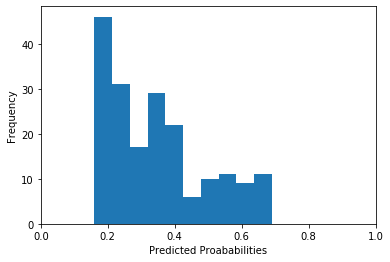

In [75]:
## PLOTTING THE PREDICTIONS
plt.hist(ypred,bins=10)
plt.xlim(0,1)
plt.xlabel("Predicted Proababilities")
plt.ylabel("Frequency")

## Evaluation Matrics

In [76]:
#CLASSIFIER SCORE
round(roc_auc_score(y_test,yprediction),5)

0.66315

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score

In [78]:
print('Akurasi = ', round(accuracy_score(y_test,yprediction), 1))
print('Error Rate = ', 1 - round(accuracy_score(y_test,yprediction), 1))
print('Precision(+) = ', round(precision_score(y_test,yprediction, pos_label = 1), 1))
print('Precision(-) = ', round(precision_score(y_test,yprediction, pos_label = 0), 1))
print('Recall(+) = ', round(recall_score(y_test,yprediction, pos_label = 1), 1))
print('Recall(-) = ', round(recall_score(y_test,yprediction, pos_label = 0), 1))
print('F1 Score(+) = ', round(f1_score(y_test,yprediction, pos_label = 1), 1))
print('F1 Score(-) = ', round(f1_score(y_test,yprediction, pos_label = 0), 1))

Akurasi =  0.8
Error Rate =  0.19999999999999996
Precision(+) =  0.7
Precision(-) =  0.8
Recall(+) =  0.4
Recall(-) =  0.9
F1 Score(+) =  0.5
F1 Score(-) =  0.8


In [80]:
# ATAU dengan classification_report

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
print("Confusion Matrix:")
print(confusion_matrix(y_test, yprediction))
print()
print("Classification Report")
print(classification_report(y_test, yprediction))

Confusion Matrix:
[[120  10]
 [ 37  25]]

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.92      0.84       130
           1       0.71      0.40      0.52        62

    accuracy                           0.76       192
   macro avg       0.74      0.66      0.68       192
weighted avg       0.75      0.76      0.73       192

